In [238]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [239]:
np.random.seed(seed=123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
stopnie_swobody = range(1, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10, 20, 50, 100, 200]
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 100

In [240]:
def wybor_testu(l_danych,stopien_s,test,probka):

    # Tutaj bede skladowal ile razy odrzucilem hipoteze zerowa dla danego testu 

    # Tutaj jest moment decyzyjny, który test mam wybrać
    if test =="kol":
        if stats.kstest(probka,"chi2",args=(stopien_s,)).pvalue < poziom_istotnosci: return 1

    
    elif test == "chi":
        expected_data = np.array([(i+1)**2 for i in range(len(probka))])
        expected_data = (expected_data* np.sum(probka)/np.sum(expected_data))
        if stats.chisquare(probka,expected_data).pvalue < poziom_istotnosci: return 1

    return 0



In [241]:
def symulacja(l_danych,stopien_s,test):

    # W tej zmiennej będę sumował liczbę razy, gdy dla danego zestawu danych odrzuciłem hipotezę zerową
    suma_odrzucenia_H0 = 0
    
    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z rozkładu t-Studentao l_danych wielkości i stopien_s stopni swobody
        probka = stats.chi2.rvs(stopien_s, size=l_danych)

        # Przekazuje wszystkie dane, aby wybrac który test jest symulowany i obliczyc ile razy odrzuce hipoteze zerowa
        suma_odrzucenia_H0 += wybor_testu(l_danych,stopien_s,test,probka)
    


    return suma_odrzucenia_H0/liczba_symulacji








In [242]:
def obliczanie_mocy_testu(test):
    # Tablica ktora zbierze mi moce testów
    moce_testow = []
    
    # Dla każdej z liczby danych, będę wykonywał symulacje 
    for l_danych in liczby_danych:
        # Tworzę nową tablicę która będzie przechowywała moce testu dla n-tej liczby danych. Dla kazdego stopnia swobody robię symulację i 
        # od razu stworze liste 
        moce_testow.append([symulacja(l_danych,stopien_s,test) for stopien_s in stopnie_swobody])

    # Zwracam wartości mocy
    return moce_testow


In [243]:
# moc_kol = obliczanie_mocy_testu("kol")

In [244]:

# for moc in moc_kol:
#     plt.plot(moc)

# plt.ylim(0,0.5)
# plt.show()

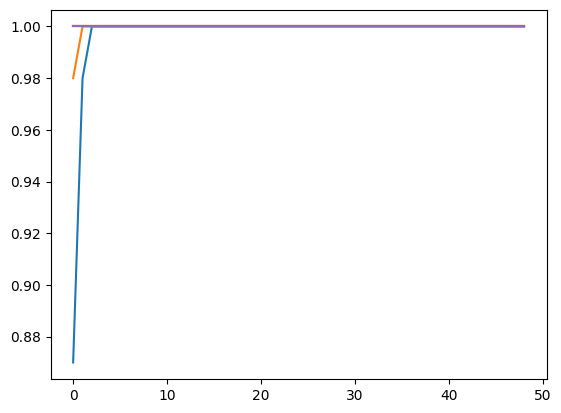

In [245]:
moc_chi = obliczanie_mocy_testu("chi")

for moc in moc_chi:
    plt.plot(moc)

plt.show()